# Примеры распределений по росту

Данные взяты отсюда https://people.sc.fsu.edu/~jburkardt/data/csv/hw_25000.csv

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline

In [9]:
data = pd.read_csv( 'hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 0 )
data.head()

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [10]:
# переводим высоту в сантиметры

data['height'] = data['height_inches'] * 2.54
data.head()

,index,height_inches,weight_pounds,height
0,1,65.78331,112.9925,167.089607
1,2,71.51521,136.4873,181.648633
2,3,69.39874,153.0269,176.272800
3,4,68.21660,142.3354,173.270164
4,5,67.78781,144.2971,172.181037


In [11]:
len( data )

25000

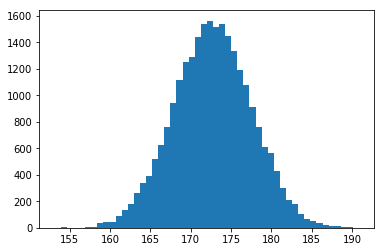

In [13]:
plt.hist( data['height'], bins = 50 )
plt.show()

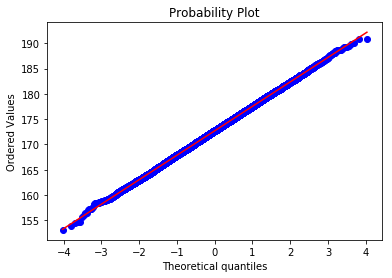

In [14]:
# проверим "нормальность" нашего распределения с помощью QQ-plot

stats.probplot( data['height'], dist="norm", plot=plt )
plt.show()

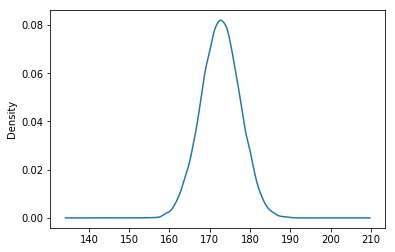

In [15]:
data['height'].plot.density()

### Стандартизация (z-преобразование)

In [17]:
np.mean( data['height'] ), np.std( data['height'] )

(172.70250853587314, 4.8301674726145984)

In [32]:
zHeight = stats.mstats.zscore( data['height'] )

In [33]:
np.mean( zHeight ), np.std( zHeight )

(6.7956307248095984e-16, 1.0)

In [34]:
customHeight = 185

In [35]:
zScore = ( customHeight - np.mean( data['height'] ) ) / np.std( data['height'] )
zScore

2.545976207626225

In [36]:
1 - stats.norm.cdf( zScore )

0.0054486307709185056

In [37]:
# доверительный интервал для заданного уровня значимости

stats.norm.interval( 0.95 )

(-1.959963984540054, 1.959963984540054)

In [38]:
stats.norm.interval( 0.99 )

(-2.5758293035489004, 2.5758293035489004)

### Доверительный интервал

In [45]:
sample = data.head(100)

In [41]:
se = np.std( sample['height'] ) / np.sqrt( len(sample['height']) )
se

0.46196209837219315

In [54]:
confidenceCoef = stats.norm.interval( 0.95 )[1]
print (confidenceCoef)

1.95996398454


In [55]:
?stats.norm.interval( 0.95 )[1]

In [44]:
( np.mean( sample['height'] ) - confidenceCoef * se, np.mean( sample['height'] ) + confidenceCoef * se )

(172.17285468896796, 173.98371283903208)